In [101]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../data/20201101/casedistribution.csv')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,01/11/2020,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.0,Asia,3.575019
1,31/10/2020,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.0,Asia,3.553989
2,30/10/2020,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.0,Asia,3.264833
3,29/10/2020,29,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.941505
4,28/10/2020,28,10,2020,113,7,Afghanistan,AF,AFG,38041757.0,Asia,3.025623


In [64]:
df['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

In [5]:
df.columns.to_list()

['dateRep',
 'day',
 'month',
 'year',
 'cases',
 'deaths',
 'countriesAndTerritories',
 'geoId',
 'countryterritoryCode',
 'popData2019',
 'continentExp',
 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']

In [185]:
def plot_subgraphs(data, country_names: list):

    parameter = 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'
    res = data[['dateRep',parameter, 'countriesAndTerritories']]
    
    countr_values = {}
    fig, axes = plt.subplots(nrows=1, ncols=len(country_names))
    for idx, name in enumerate(country_names):
        country_df = res[res['countriesAndTerritories'] == name]
        country_df = country_df.rename(columns={parameter: name })
        country_df = country_df.iloc[::-1]
        country_df['dateRep'] = pd.to_datetime(country_df['dateRep'], format='%d/%m/%Y')
        country_df = country_df.set_index('dateRep')
        country_df.plot(ax=axes[idx], figsize=(15,5))    
    
    return res

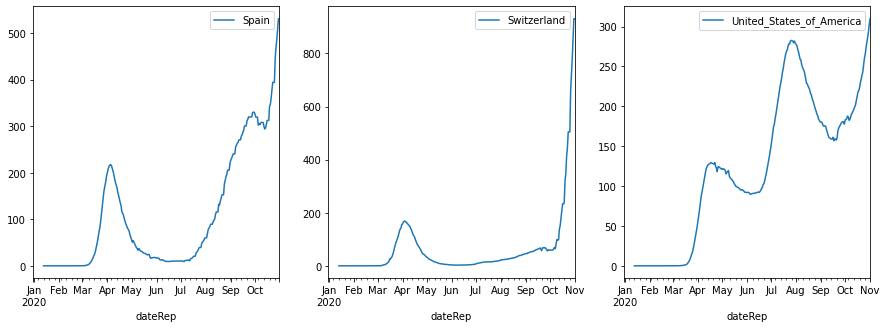

In [186]:
res = plot_subgraphs(df, ['Spain', 'Switzerland', 'United_States_of_America'])

In [182]:
def plot_common_graph(data, country_names: list = [], title=None):

    parameter = 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'
    
    if title is None:
        title = parameter
        
    res = data[['dateRep', parameter, 'countriesAndTerritories']]
    res.loc[:, 'dateRep'] = pd.to_datetime(res['dateRep'], format='%d/%m/%Y')
    
    df_all = pd.DataFrame(index=res['dateRep'].unique())
    
    if len(country_names) == 0:
        country_names = res.loc[:,'countriesAndTerritories'].unique()
        
    for name in country_names:
        country_df = res.loc[res['countriesAndTerritories'] == name]
        country_df = country_df.rename(columns={parameter: name })
        country_df = country_df[['dateRep', name]]
        country_df = country_df.set_index('dateRep')
    
        df_all = df_all.join(country_df)
    
    df_all.plot(figsize=(15,10), title=title)


/Users/pabloospinosanchez/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


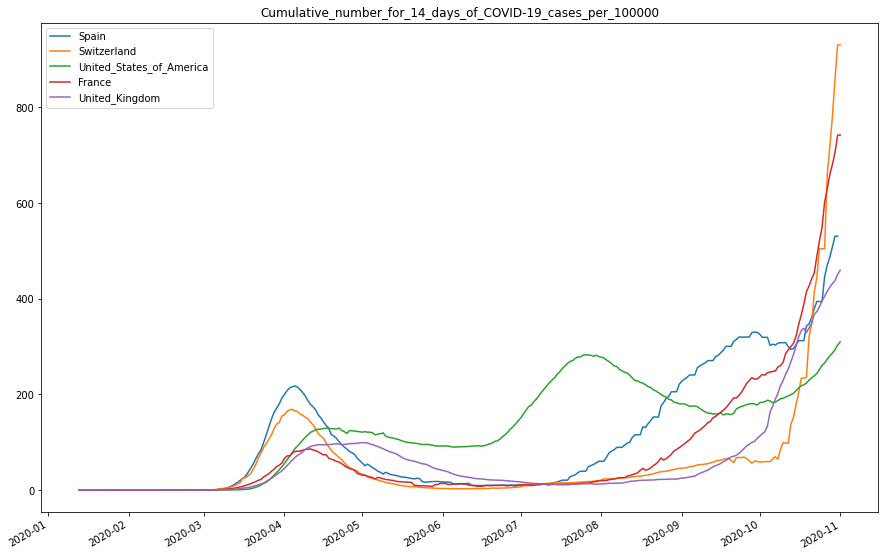

In [183]:
plot_common_graph(df, ['Spain', 'Switzerland', 'United_States_of_America', 'France', 'United_Kingdom'])